In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput

In [2]:
source_dir = "../outputs/ergotropy/"

In [2]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(-4, 4, 8000)

In [4]:
in_one_photon = np.loadtxt(source_dir+"input_one_photon_1.dat")
excited_atom = np.loadtxt(source_dir+"excited_atom_1.dat")
gs_atom = np.loadtxt(source_dir+"gs_atom_1.dat")

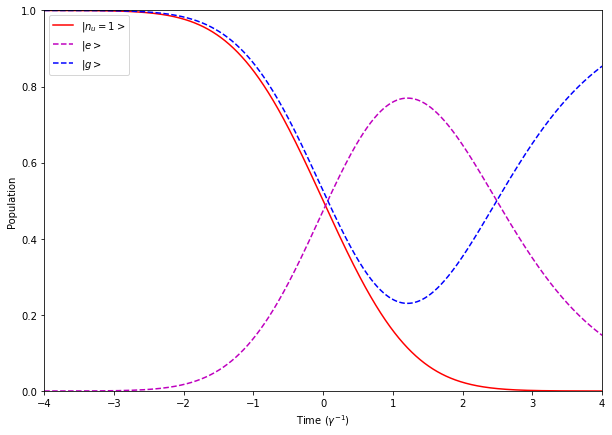

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
ax.plot(tlist, excited_atom, '--m', label='$|e>$')
ax.plot(tlist, gs_atom, '--b', label='$|g>$')
ax.set_xlim(-4,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

NameError: name 'excited_atom' is not defined

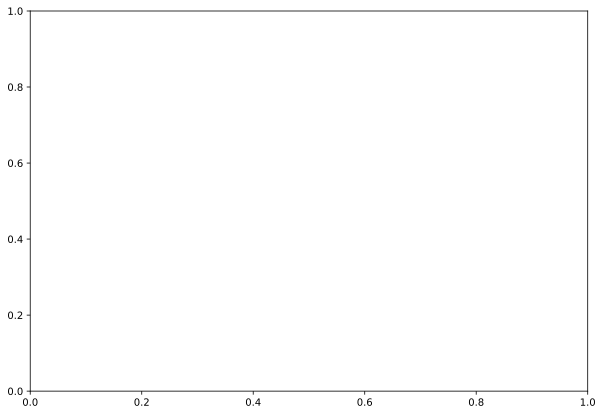

In [22]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, excited_atom+gs_atom, '-r')
ax.set_xlim(-4,4)
#ax.set_ylim(0,1)


plt.show()

In [19]:
gas_pur = np.loadtxt("../outputs/ergotropy/gaussian_purity_1.0.dat")
gas_erg = np.loadtxt("../outputs/ergotropy/gaussian_ergotropy_1.0.dat")
gas_ene = np.loadtxt("../outputs/ergotropy/gaussian_energy_1.0.dat")

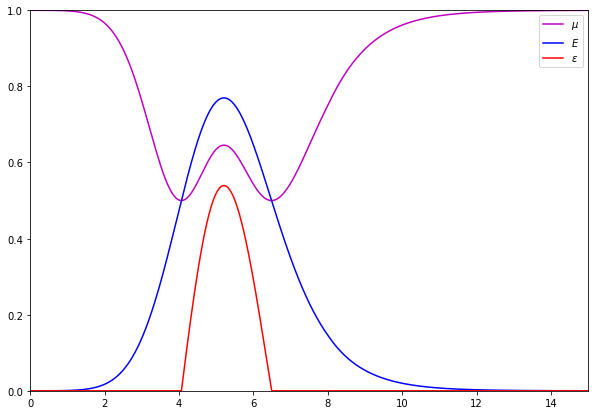

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(gas_pur[:,0], gas_pur[:,1], '-m', label='$\mu$')
ax.plot(gas_ene[:,0], gas_ene[:,1], '-b', label='$E$')
ax.plot(gas_erg[:,0], gas_erg[:,1], '-r', label='$\epsilon$')

ax.set_xlim(0,15)
ax.set_ylim(0,1)

ax.legend()

plt.show()

In [3]:
source_dir = "../outputs/ergotropy/max_gaussian/"

In [4]:
max_erg_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/ergotropy*.dat")))) for i in range(1,11)]
max_ene_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/energy*.dat")))) for i in range(1,11)]
max_pow_fock = [np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "fock_" + str(i) + "/power*.dat")))) for i in range(1,11)]

In [23]:
def plot_max(x, max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, max_erg, '-r', label='$\epsilon_{max}$')
    ax.plot(x, max_ene, '-b', label='$E_{max}$')
    ax.plot(x, max_pow, '-m', label='$P_{max}$')
    
    ax.set_xlim(x[0],x[-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

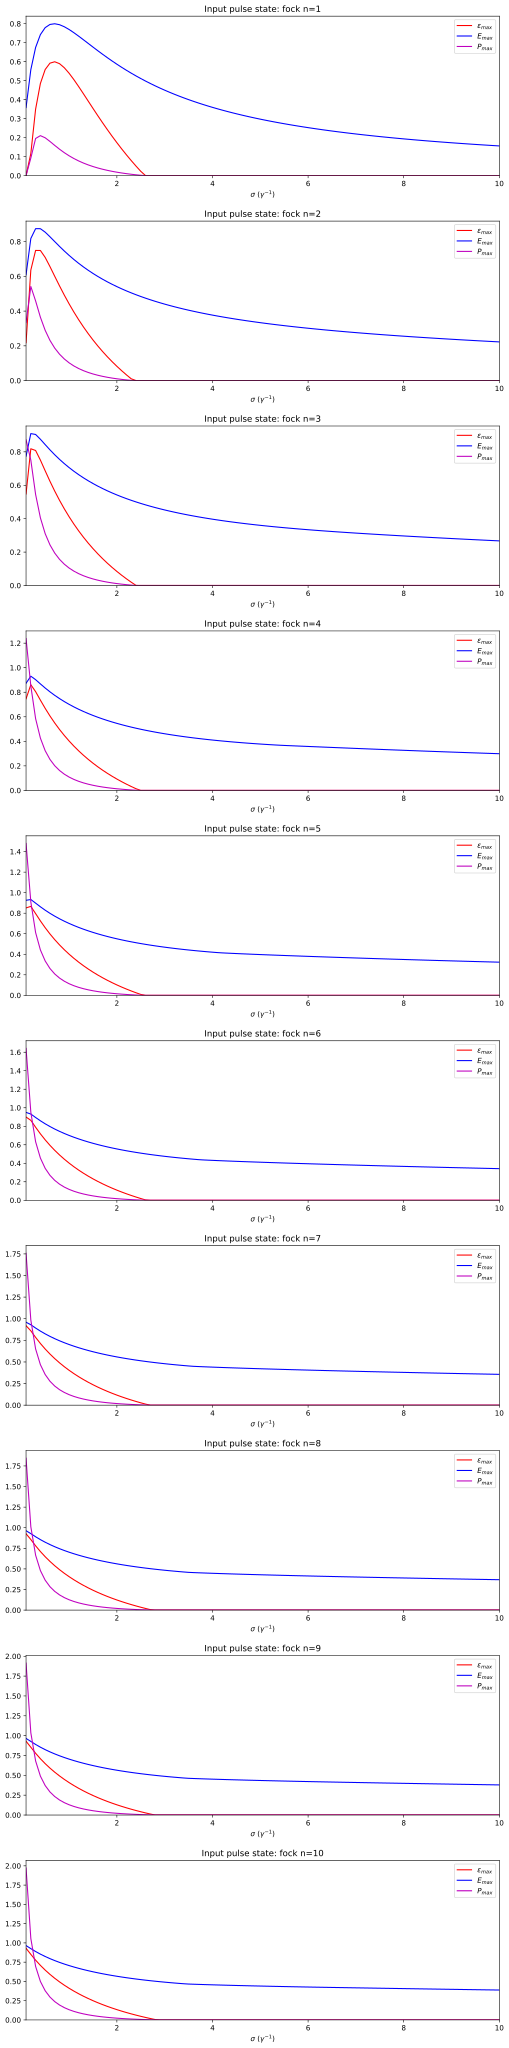

In [25]:
fig, axes = plt.subplots(len(max_erg_fock),figsize=(10, 40))
#fig.set_figheight(7)
#fig.set_figwidth(10)

for i in range( len(max_erg_fock) ):
    plot_max(sigma_list, max_erg_fock[i], max_ene_fock[i], max_pow_fock[i], title='fock n='+str(i+1), ax=axes[i])

plt.tight_layout()
plt.show()

In [26]:
max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/power*.dat"))))

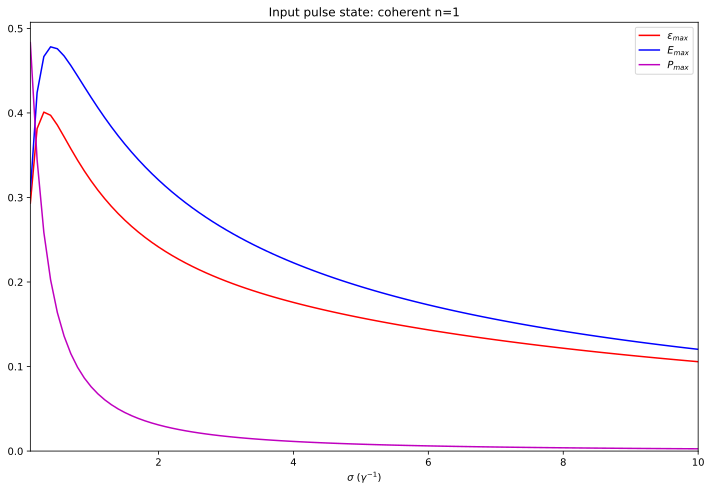

In [31]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_coherent, max_ene=max_ene_coherent, max_pow=max_pow_coherent, 
         title='coherent n=1', ax=axes)

plt.tight_layout()
plt.show()

In [32]:
max_erg_squeezed = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/ergotropy*.dat"))))
max_ene_squeezed = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/energy*.dat"))))
max_pow_squeezed = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/power*.dat"))))

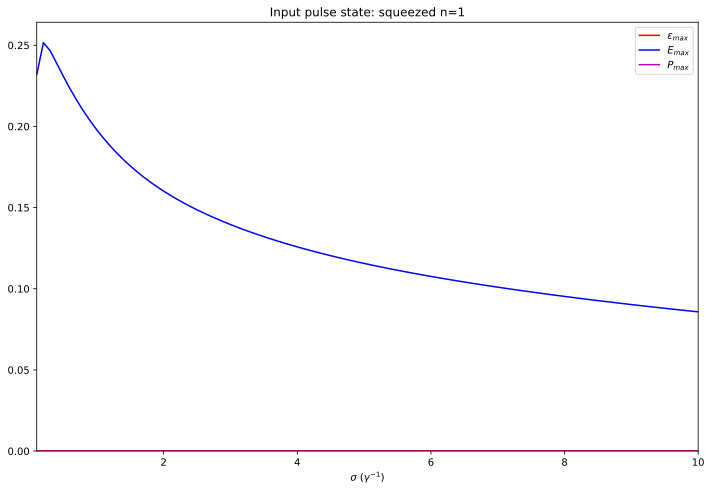

In [33]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed, max_ene=max_ene_squeezed, max_pow=max_pow_squeezed, 
         title='squeezed n=1', ax=axes)

plt.tight_layout()
plt.show()